In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'qrt-project:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4489423%2F7692428%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240224%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240224T215835Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1fe31e758f5e8691fe2266511ababf6b1e7b18d46bbb4dcbd27a18a08bac316d503f55f4c18d60cd05d2f74ef12c8d55940fce4ad29ca86b739462f51d1bfced2eea2300b999220da3e02704366caf0368b1f34a1a212bde8e8398e8e106c5a636ffa8841211a436e2a8e3646ff140a8735b772aa2c26dccbbfbfcffcb732958589965dc4608f0005e5515156a109f3abf63ce927d6f8aef2fcd7daf136cd82e2b99dbfa73c8377d6b140036c74542f2b8cf2cfd490ec20654c9bd14cf6dea490102f1fb9b25490bd88c5ca84a4b48bf380f47481af9a80dc84a99fc85556aa2ef41ff615dbe28481d0a58d70b61ac27f55ec0d4f6886222153b89fe7fb99c80'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qrt-project/y_test_random_final (1).csv
/kaggle/input/qrt-project/train_df (1).csv
/kaggle/input/qrt-project/test_df (1).csv
/kaggle/input/qrt-project/X_test_final (1).csv
/kaggle/input/qrt-project/train_y (1) (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import os
import time
from scipy.stats import spearmanr


In [ ]:
X_train = pd.read_csv('/kaggle/input/qrt-project/train_df (1).csv')
y_train = pd.read_csv('/kaggle/input/qrt-project/train_y (1) (1).csv')

In [ ]:
X_test = pd.read_csv('/kaggle/input/qrt-project/test_df (1).csv')
y_test = pd.read_csv('/kaggle/input/qrt-project/X_test_final (1).csv')

In [ ]:
test_x_final = pd.read_csv('/kaggle/input/qrt-project/y_test_random_final (1).csv')

In [ ]:
def metric_train(output,y_train):

    return  spearmanr(output, y_train).correlation



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a regression model and return MSE, MAE, and R-squared.

    Parameters:
    - model: A trained regression model from Scikit-learn.
    - X_test: Test features.
    - y_test: True target values.

    Returns:
    - mse: Mean Squared Error.
    - mae: Mean Absolute Error.
    - r2: R-squared.
    """
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2

In [ ]:
def plot_predictions(model, X_test, Y_test):
    """
    Plot the predictions of a regression model.

    Parameters:
    - y_test: True target values.
    - y_pred: Predicted target values.
    """
    # Predict on test set
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))

    # Plot true values
    plt.scatter(Y_test, Y_test, color = "b", label = "True values")

    # Plot predicted values
    plt.scatter(Y_test, y_pred, color = "r", label = "Predicted values")

    plt.title('True vs Predicted Values')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression


def get_model(model_wanted: str, X_train, Y_train, parameters=None) -> object:

    parameters = parameters or {}

    if model_wanted == "linear_regression":  # provided in by ENS
        model = LinearRegression()

    elif model_wanted == "random_forest":  # 2nd lecture
        model = RandomForestRegressor(**parameters)

    elif model_wanted == "gradient_boosting":  # parameters to tune
        model = GradientBoostingRegressor(**parameters)

    elif model_wanted == "catboost":  # CatBoost model
        model = CatBoostRegressor(**parameters)

    elif model_wanted == "adaboost":  # AdaBoost model
        model = AdaBoostRegressor(**parameters)

    elif model_wanted == "lightgbm":  # LightGBM model
        model = LGBMRegressor(**parameters)

    elif model_wanted == "xgboost":  # XGB model
        model = XGBRegressor(**parameters)


    else:
        raise ValueError("Invalid model name")

    model.fit(X_train, Y_train)
    return model


In [ ]:
"""# To get a Random Forest model
rf_model = get_model("random_forest", X_train, y_train, parameters={'n_estimators': 100, 'random_state': 42})

# To get a CatBoost model
cb_model = get_model("catboost", X_train, y_train, parameters={'iterations': 100, 'verbose': False})

# To get an AdaBoost model
ab_model = get_model("adaboost", X_train, y_train, parameters={'n_estimators': 50})

# To get a LightGBM model
lgb_model = get_model("lightgbm", X_train, y_train, parameters={'num_leaves': 31, 'learning_rate': 0.05, 'n_estimators': 100})
"""

'# To get a Random Forest model\nrf_model = get_model("random_forest", X_train, y_train, parameters={\'n_estimators\': 100, \'random_state\': 42})\n\n# To get a CatBoost model\ncb_model = get_model("catboost", X_train, y_train, parameters={\'iterations\': 100, \'verbose\': False})\n\n# To get an AdaBoost model\nab_model = get_model("adaboost", X_train, y_train, parameters={\'n_estimators\': 50})\n\n# To get a LightGBM model\nlgb_model = get_model("lightgbm", X_train, y_train, parameters={\'num_leaves\': 31, \'learning_rate\': 0.05, \'n_estimators\': 100})\n'

In [ ]:
# Updated models to test with CatBoost, AdaBoost, and LightGBM

# Updated models to test with CatBoost, AdaBoost, LightGBM, and now Logistic Regression
models_to_test = {
    "linear_regression": None,
    "random_forest": {"n_estimators": 100, "random_state": 777},
    "gradient_boosting": {"n_estimators": 100, "random_state": 777},
    "catboost": {"iterations": 100, "random_state": 777, "verbose": False},
    "adaboost": {"n_estimators": 50, "random_state": 777},
    "lightgbm": {"num_leaves": 31, "learning_rate": 0.05, "n_estimators": 100, "random_state": 777},
    "xgboost": {"n_estimators": 100, "learning_rate": 0.1, "random_state": 777}}



In [ ]:
results = []

for model_wanted, params in models_to_test.items():
    start_time = time.time()
    model = get_model(model_wanted, X_train, y_train, params)
    training_time = time.time() - start_time

    mse, mae, r2 = evaluate_model(model, X_train, y_train)


    # Predictions
    Y_test_predictions = model.predict(X_test)
    output_train = model.predict(X_train)
    sc = spearmanr(output_train, y_train).correlation
    results.append({"Model": model_wanted, "MSE": mse, "MAE": mae, "R-squared": r2, "Spearman Correlation": sc, "Training Time (s)": training_time})




results_df = pd.DataFrame(results)

/tmp/ipykernel_33/1695277602.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10454
[LightGBM] [Info] Number of data points in the train set: 1494, number of used features: 41
[LightGBM] [Info] Start training from score 0.089934


In [ ]:
results_df

,Model,MSE,MAE,R-squared,Spearman Correlation,Training Time (s)
0,linear_regression,1.007896,0.570350,0.057728,0.282749,0.008636
1,random_forest,0.460711,0.410996,0.569285,0.705836,7.016092
2,gradient_boosting,0.632364,0.485608,0.408809,0.527472,1.703051
3,catboost,0.467540,0.426235,0.562901,0.666339,0.624797
4,adaboost,1.058812,0.767298,0.010127,0.206557,0.468092
5,lightgbm,0.517071,0.430942,0.516595,0.678818,0.500108
6,xgboost,0.448704,0.409082,0.580511,0.697189,0.908484


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function to display distribution for numerical columns
def numerical_distribution(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    for col in numerical_cols:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()





/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


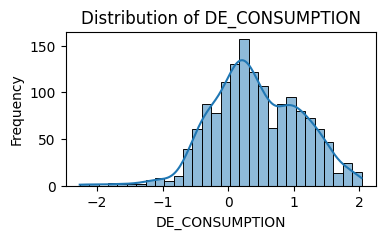

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


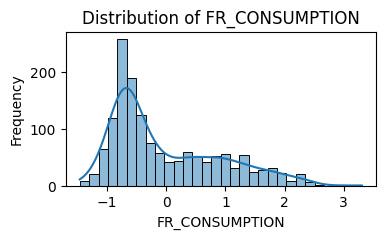

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


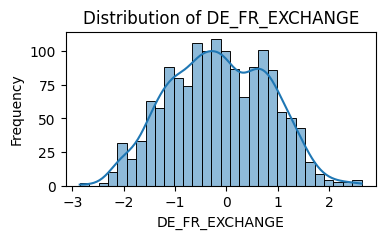

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


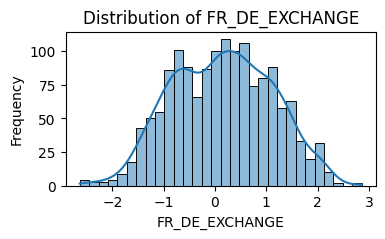

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


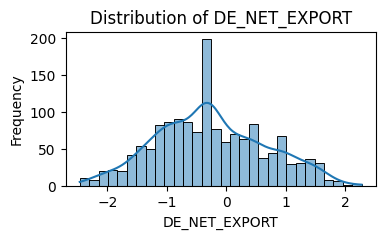

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


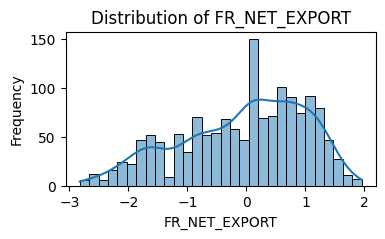

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


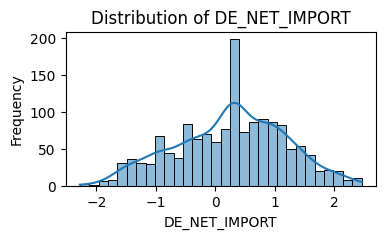

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


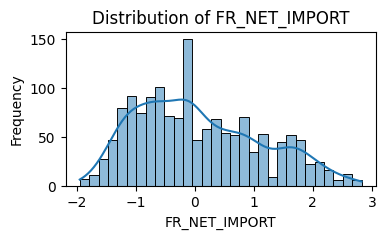

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


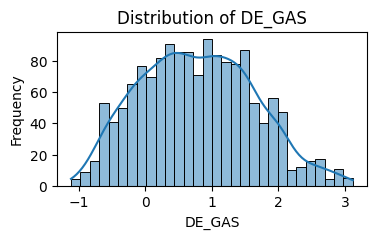

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


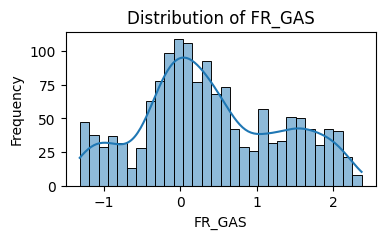

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


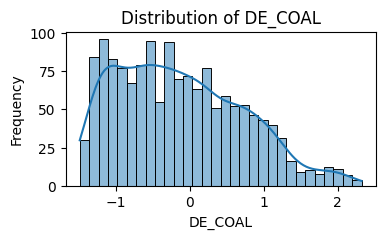

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


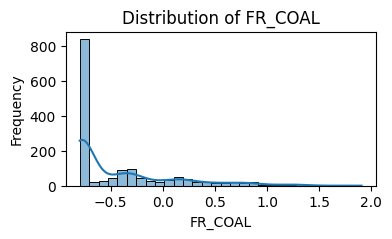

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


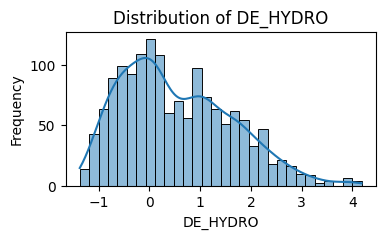

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


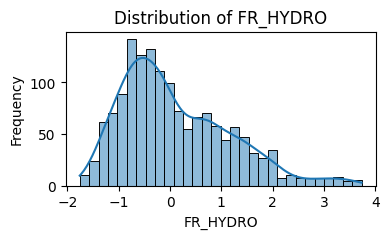

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


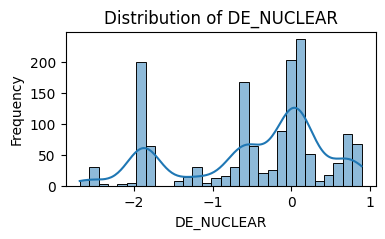

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


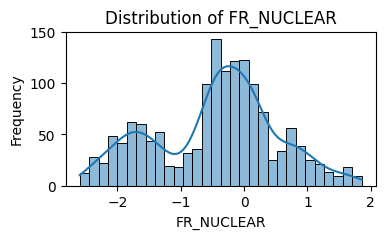

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


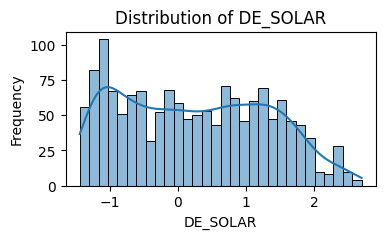

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


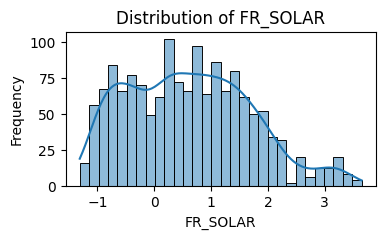

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


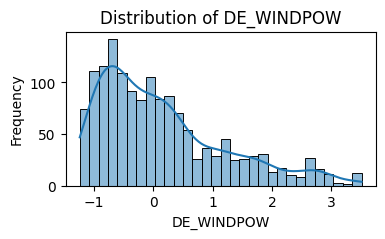

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


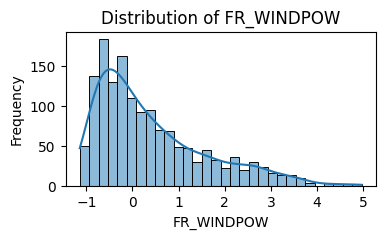

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


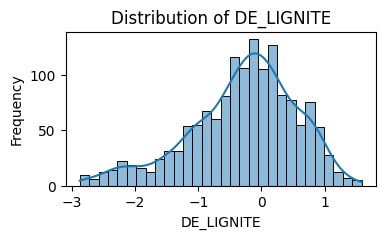

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


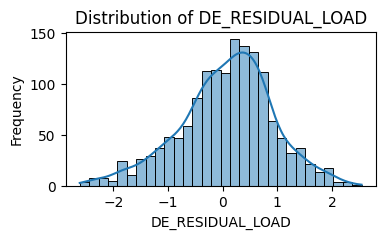

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


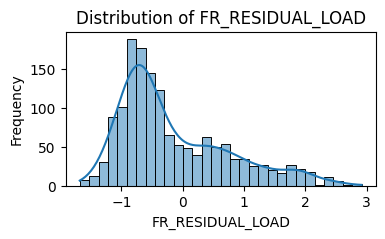

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


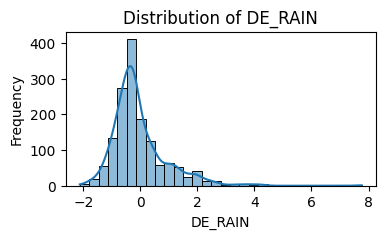

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


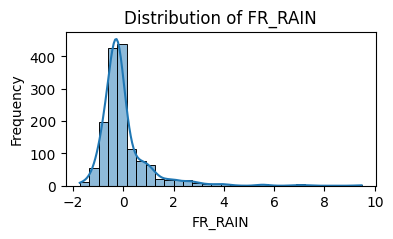

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


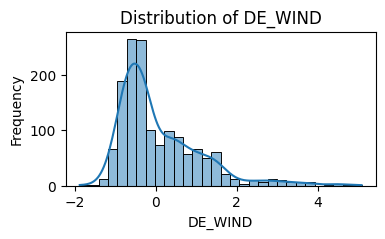

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


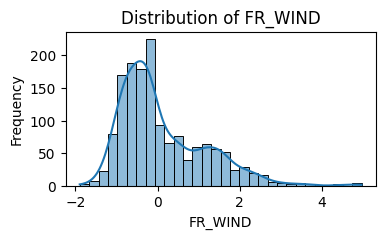

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


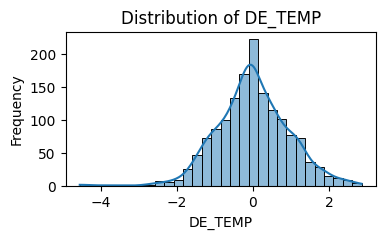

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


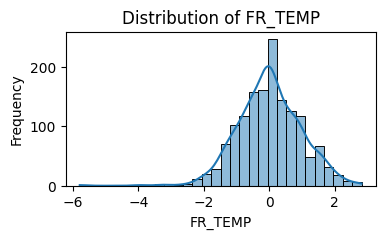

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


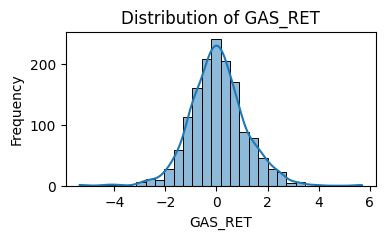

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


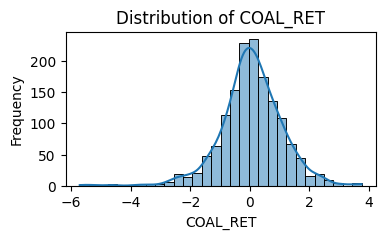

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


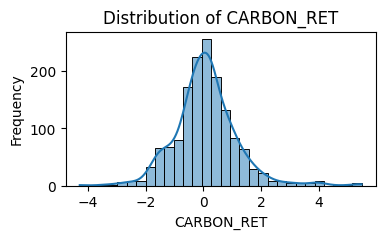

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


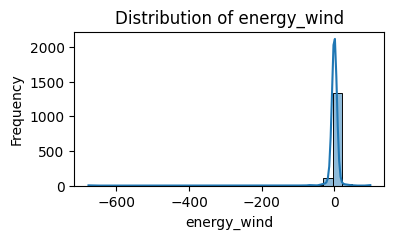

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


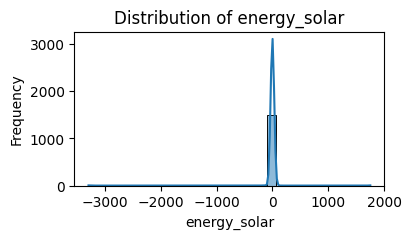

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


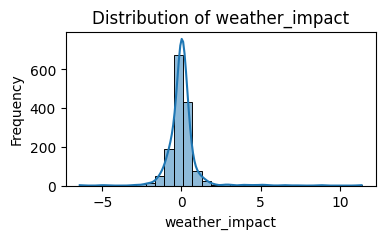

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


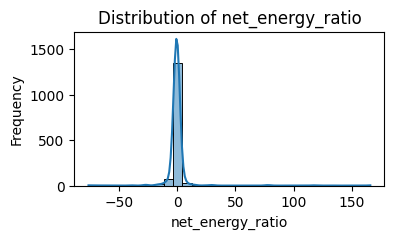

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


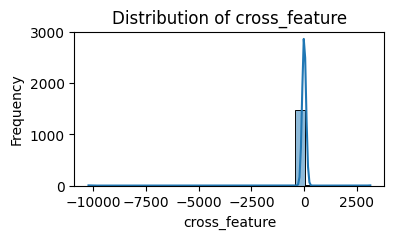

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


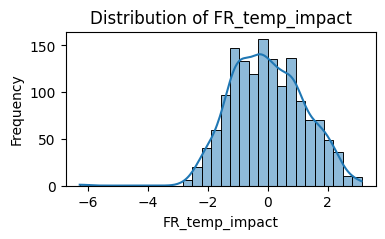

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


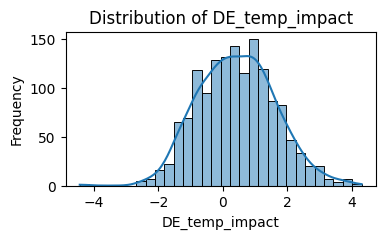

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


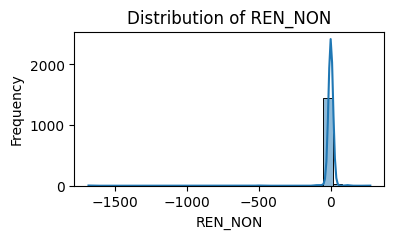

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


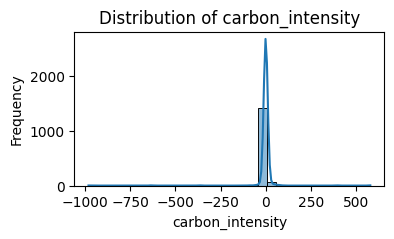

In [ ]:
numerical_distribution(X_train)


In [ ]:
X_train.columns

Index(['DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
       'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
       'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
       'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW',
       'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD',
       'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP',
       'GAS_RET', 'COAL_RET', 'CARBON_RET', 'energy_wind', 'energy_solar',
       'weather_impact', 'net_energy_ratio', 'cross_feature', 'FR_temp_impact',
       'DE_temp_impact', 'REN_NON', 'carbon_intensity'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/tmp/ipykernel_33/3294709838.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns.append(y_train.columns)
feature_importance_dict = dict(zip(feature_names, importances))

In [ ]:
import pandas as pd

"""# Assuming 'features' and 'importances' are your lists from the sorted feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()"""



"# Assuming 'features' and 'importances' are your lists from the sorted feature importances\nfeature_importances_df = pd.DataFrame({\n    'Feature': features,\n    'Importance': importances\n})\n\nplt.figure(figsize=(15, 10))\nsns.barplot(data=feature_importances_df, x='Importance', y='Feature')\nplt.title('Feature Importances')\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.show()"

Skipping LinearRegression() because it does not support feature_importance function.


/tmp/ipykernel_33/1695277602.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


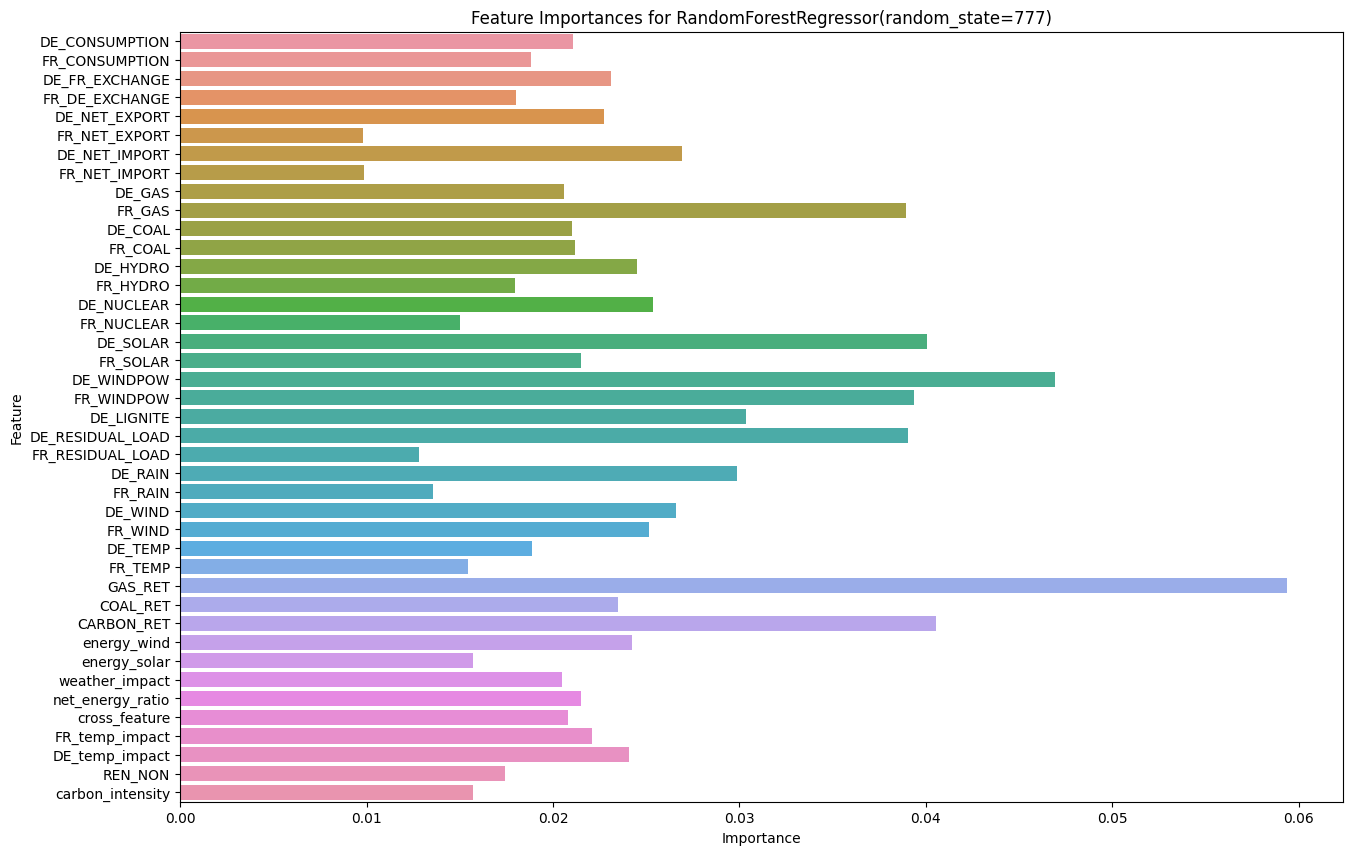

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


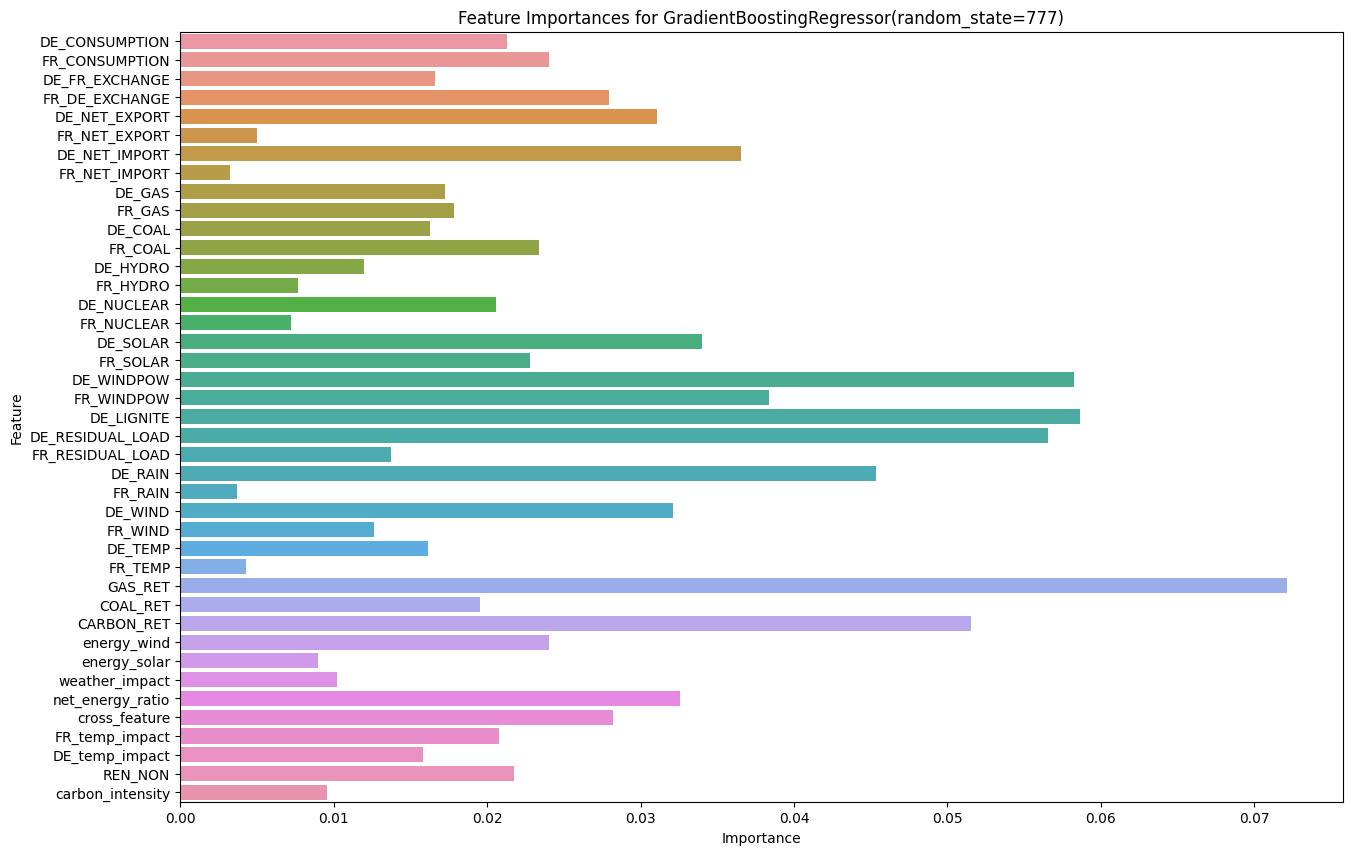

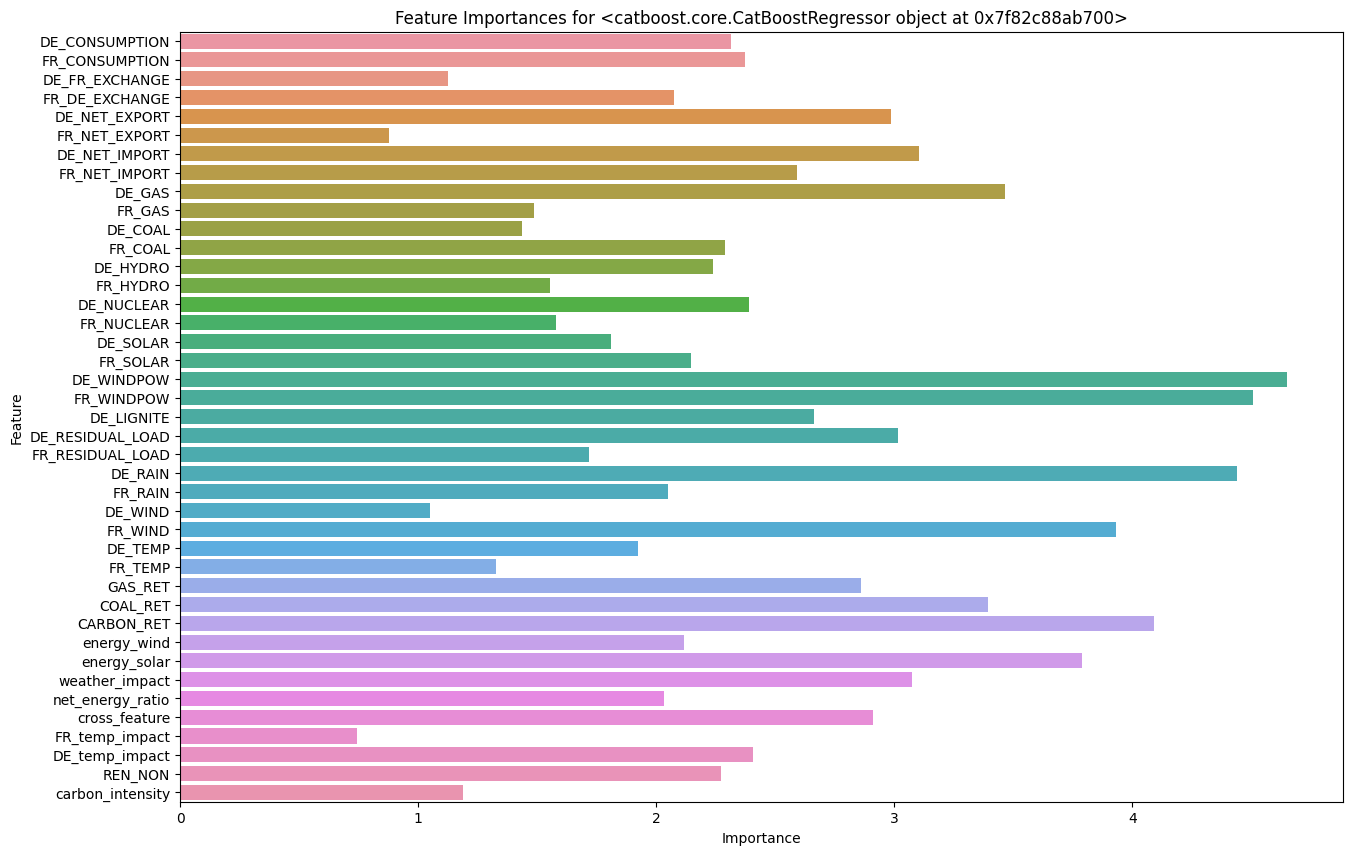

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


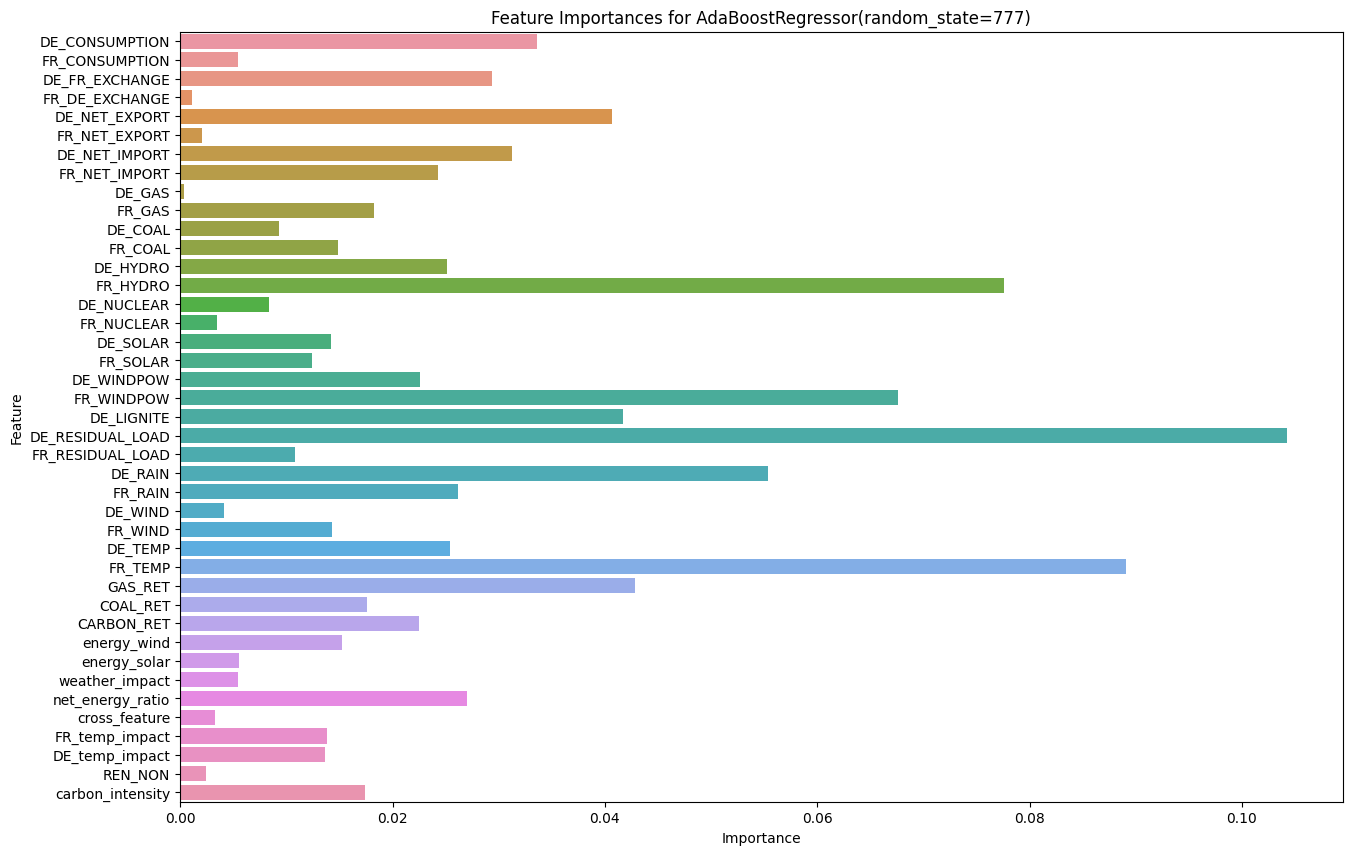

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10454
[LightGBM] [Info] Number of data points in the train set: 1494, number of used features: 41
[LightGBM] [Info] Start training from score 0.089934


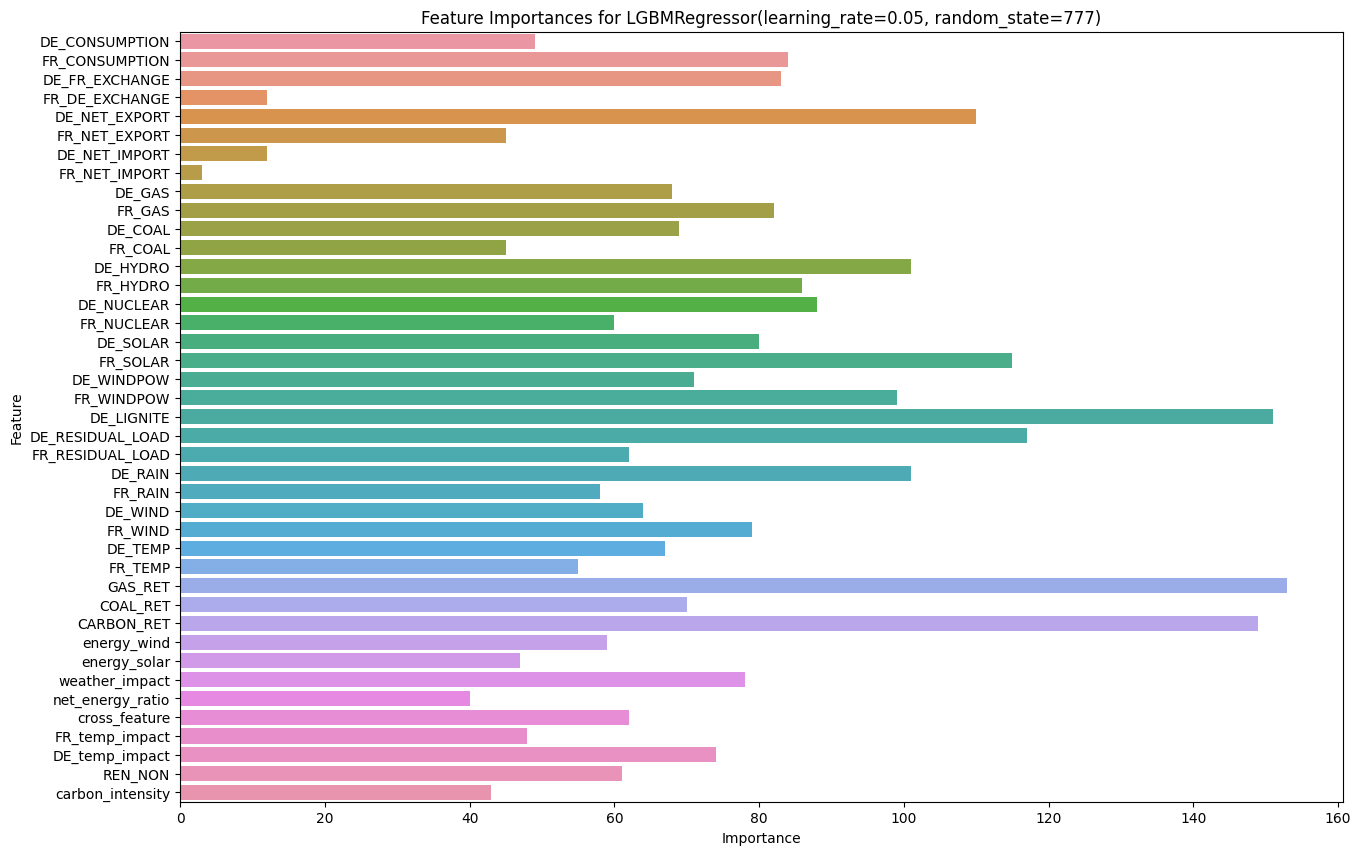

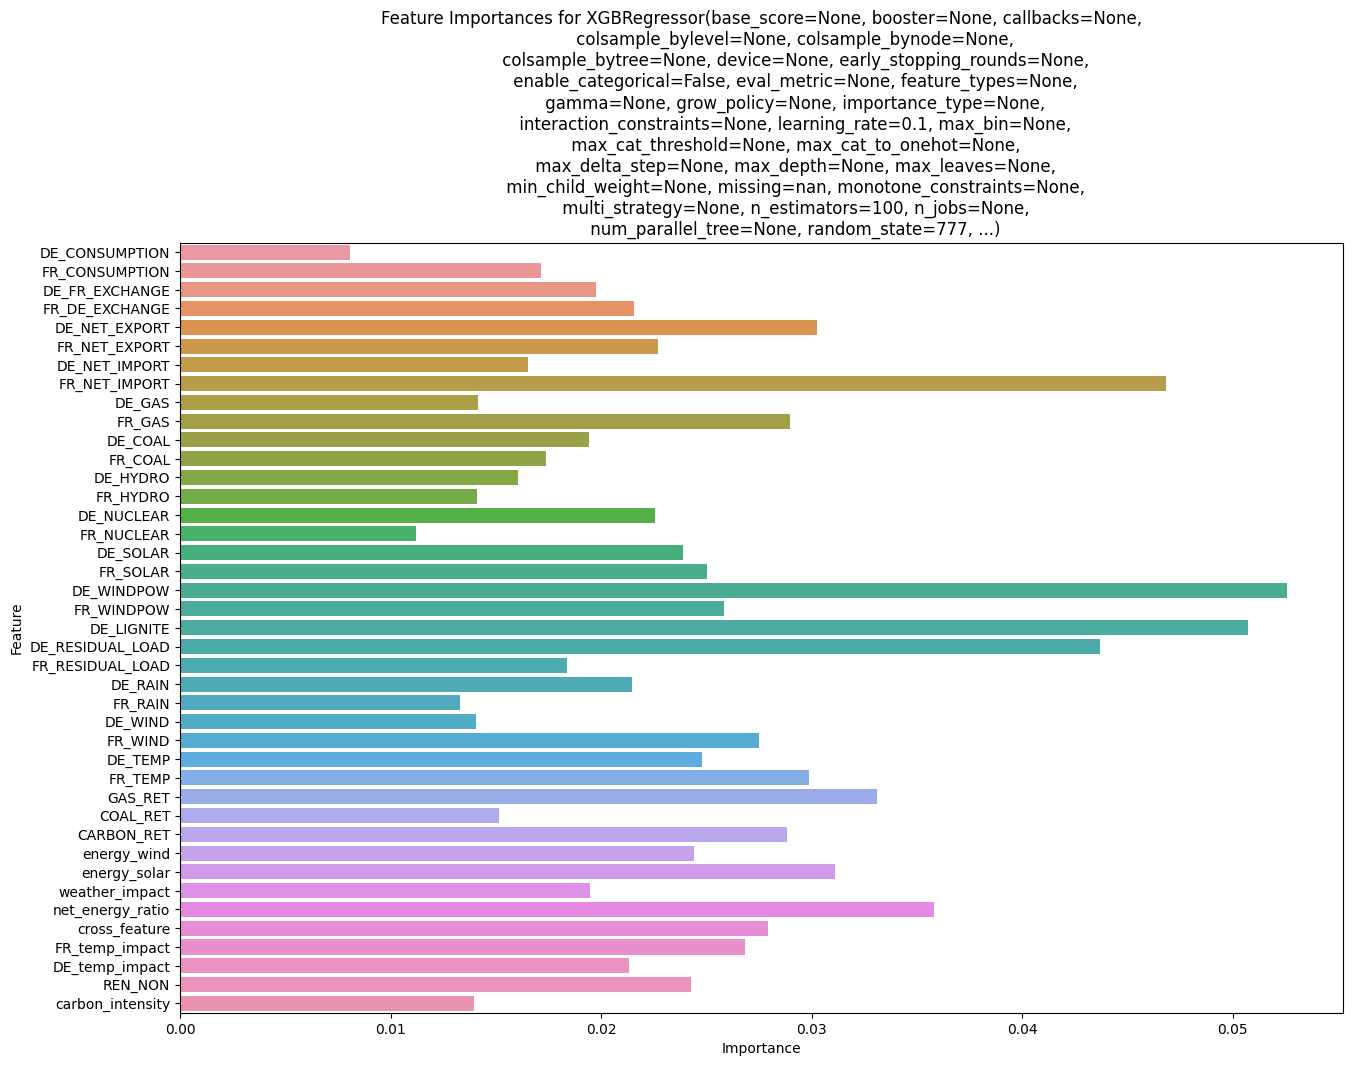

In [ ]:
results = []

for model_wanted, params in models_to_test.items():
    start_time = time.time()
    model = get_model(model_wanted, X_train, y_train, params)
    if isinstance(model, LinearRegression):
        print(f"Skipping {model} because it does not support feature_importance function.")
        continue
    importances = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_dict = dict(zip(feature_names, importances))
    feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
    })

    plt.figure(figsize=(15, 10))
    sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
    plt.title(f'Feature Importances for {model}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()



results_df = pd.DataFrame(results)

# Weighted Average of XGB, RF and CATBoost Baseline Models


In [ ]:
import numpy as np
import time

# Define the weights for the models
# Ensure these weights sum to 1
weights = {
    "random_forest": 0.4,  # example weight
    "xgboost": 0.35,
    "catboost": 0.25
}

# Initialize a dictionary to store predictions from each model
model_predictions = {
    "random_forest": None,
    "xgboost": None,
    "catboost": None
}

for model_wanted, params in models_to_test.items():
    # Filter to only include the specified models
    if model_wanted in weights:
        start_time = time.time()
        model = get_model(model_wanted, X_train, y_train, params)
        training_time = time.time() - start_time

        # Generate predictions for the test set
        Y_test_predictions = model.predict(X_test)
        # Convert predictions to a numpy array to ensure consistency
        Y_test_predictions = np.asarray(Y_test_predictions).reshape(-1)  # Reshape for safety

        # Store the predictions
        model_predictions[model_wanted] = Y_test_predictions

# Now, calculate the weighted average of the predictions
weighted_predictions = np.zeros_like(model_predictions["random_forest"])  # Initialize with zeros of the same shape as predictions

for model_wanted, predictions in model_predictions.items():
    weighted_predictions += predictions * weights[model_wanted]  # Add weighted predictions

# weighted_predictions now contains the final weighted average predictions



/tmp/ipykernel_33/1695277602.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


In [ ]:
np.savetxt("weighted_predictions.csv", weighted_predictions, delimiter=",")


In [ ]:
test_x_final

,ID,TARGET
0,1115,-0.052395
1,1202,-0.112118
2,1194,1.050431
3,1084,-1.267154
4,1135,0.751565
...,...,...
649,879,-0.628430
650,673,0.443745
651,1641,0.338772
652,712,-0.761823


In [ ]:
X_test.shape, y_test.shape

((654, 41), (654, 35))

In [ ]:
y_test.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [ ]:
X_test.columns

Index(['DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
       'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
       'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
       'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW',
       'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD',
       'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP',
       'GAS_RET', 'COAL_RET', 'CARBON_RET', 'energy_wind', 'energy_solar',
       'weather_impact', 'net_energy_ratio', 'cross_feature', 'FR_temp_impact',
       'DE_temp_impact', 'REN_NON', 'carbon_intensity'],
      dtype='object')

In [ ]:
Y_test_submission = pd.DataFrame(test_x_final.copy(), columns = ['ID'])
Y_test_submission['TARGET'] = weighted_predictions

In [ ]:
Y_test_submission

,ID,TARGET
0,1115,-0.019238
1,1202,0.005924
2,1194,-0.000127
3,1084,0.078302
4,1135,0.276746
...,...,...
649,879,-0.377462
650,673,0.153523
651,1641,0.986977
652,712,0.493182


In [ ]:
#Y_test_submission.to_csv('Y_test_submission.csv', index=False)


![Screenshot 2024-02-24 at 22.47.09.png](attachment:b6fe5bbe-8850-4be6-a8d8-234ca47fd732.png)

# Weighted Average of All Models

In [ ]:
weights = {
    "linear_regression": 0.05,  # Lower weight due to higher MSE and lower R-squared
    "random_forest": 0.20,  # High performance
    "gradient_boosting": 0.10,  # Reasonable performance
    "catboost": 0.20,  # High performance
    "adaboost": 0.05,  # Lower performance
    "lightgbm": 0.15,  # Competitive performance
    "xgboost": 0.25  # High performance
}

In [ ]:
model_predictions = {
    "linear_regression": None,
    "random_forest": None,
    "gradient_boosting": None,
    "catboost": None,
    "adaboost": None,
    "lightgbm": None,
    "xgboost": None
}

In [ ]:
for model_wanted, params in models_to_test.items():
    # Filter to only include the specified models
    if model_wanted in weights:
        start_time = time.time()
        model = get_model(model_wanted, X_train, y_train, params)
        training_time = time.time() - start_time

        # Generate predictions for the test set
        Y_test_predictions = model.predict(X_test)
        # Convert predictions to a numpy array to ensure consistency
        Y_test_predictions = np.asarray(Y_test_predictions).reshape(-1)  # Reshape for safety

        # Store the predictions
        model_predictions[model_wanted] = Y_test_predictions

# Now, calculate the weighted average of the predictions
weighted_predictions = np.zeros_like(model_predictions["random_forest"])  # Initialize with zeros of the same shape as predictions

for model_wanted, predictions in model_predictions.items():
    weighted_predictions += predictions * weights[model_wanted]  # Add weighted predictions

# weighted_predictions now contains the final weighted average predictions



/tmp/ipykernel_33/1695277602.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10454
[LightGBM] [Info] Number of data points in the train set: 1494, number of used features: 41
[LightGBM] [Info] Start training from score 0.089934


In [ ]:
Y_test_submission_final = pd.DataFrame(test_x_final.copy(), columns = ['ID'])
Y_test_submission_final['TARGET'] = weighted_predictions

In [ ]:
Y_test_submission_final

,ID,TARGET
0,1115,-0.015055
1,1202,0.027513
2,1194,0.032683
3,1084,0.093466
4,1135,0.322145
...,...,...
649,879,-0.437253
650,673,0.163075
651,1641,1.047564
652,712,0.451452


In [ ]:
Y_test_submission_final.to_csv('Y_test_submission_final.csv', index=False)


In [ ]:
#Your submission score is : 0.19908536577518463 Hence not an improvement